# <b>PYTORCH : </b> 

It’s a Python based scientific computing package targeted at two sets of audiences:<br>
1.Replacement for NumPy to use the power of GPUs<br>
2.A deep learning research platform that provides maximum flexibility and speed

In [1]:
#import the packages required

#torch pacakages
import torch
import torchvision
import torchvision.transforms as transforms
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

#other python libararies
import matplotlib.pyplot as plt
import numpy as np

#gpu or cpu
GPU = 0

### The aim objective of this notebook is to classify cifar10 dataset using pytorch

The tutorial link : http://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html

In [2]:
#Functions cell

# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

1.Load data

In [3]:
#Loading and normalizing the data the cifar10 dataset.
#The cifar10 dataset is included in the torchvision package

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

#Please note this is an array not a python list
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


  cat   cat truck plane


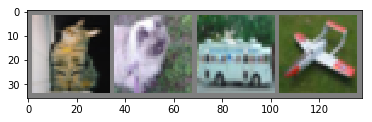

In [4]:
# get some random training images
dataiter = iter(trainloader)

#The iterator returns the image as well as a label.
images, labels = dataiter.next()

# show image
imshow(torchvision.utils.make_grid(images))

# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

2.Define a Convolutional Neural Network

In [5]:
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.conv1 = nn.Conv2d(3,6,5)#if your kernel is a square you can pass the dimension only once
        self.conv2 = nn.Conv2d(6,16,5)
        self.pool = nn.MaxPool2d(2)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
#we need to define a forward pass for all the Net's that we will create, the backward pass will be handled by the autograd

    def forward(self,x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
net = Net()

In [6]:
#lets look at the Net we created
print(net)

Net(
  (conv1): Conv2d (3, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d (6, 16, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), dilation=(1, 1))
  (fc1): Linear(in_features=400, out_features=120)
  (fc2): Linear(in_features=120, out_features=84)
  (fc3): Linear(in_features=84, out_features=10)
)


3.Define loss function and optimizer for training the network

In [7]:
#the loss : Cross Entropy Loss
criterion = nn.CrossEntropyLoss()

#here we are using SGD as the optimizer, different optimizers are defined inside the optim module
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

4.Train the network

In [8]:
#define the number of epochs
number_of_epoch = 2
for epoch in range(number_of_epoch):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        
        """
        for torch all the datasets are always used in mini-batches and 
        the loader contains the data converted into a list of minibatches
        """
        
        # get the inputs
        inputs, labels = data

        # wrap them in Variable : Mandatory step
        inputs, labels = Variable(inputs), Variable(labels)

        # zero the parameter gradients : Mandatory step
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.data[0]
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.214
[1,  4000] loss: 1.878
[1,  6000] loss: 1.677
[1,  8000] loss: 1.585
[1, 10000] loss: 1.541
[1, 12000] loss: 1.483
[2,  2000] loss: 1.416
[2,  4000] loss: 1.388
[2,  6000] loss: 1.360
[2,  8000] loss: 1.333
[2, 10000] loss: 1.323
[2, 12000] loss: 1.325
Finished Training


5.Now as we are done with the training, lets test it on the test images

GroundTruth:    cat  ship  ship plane


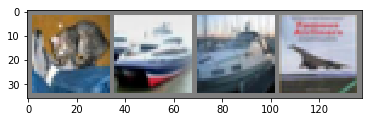

In [9]:
#get images using the iterator
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [10]:
#now to predict the images its just a one line code
outputs = net(Variable(images))

#lets check the outputs
print(outputs)

Variable containing:
 1.0169 -0.5314  0.0948  1.3932 -0.3674 -0.2246 -0.3896 -1.3340  1.6070 -1.5869
 5.7894  6.8122 -1.8707 -3.5306 -3.4903 -5.1773 -5.8923 -4.2140  6.9284  4.4439
 2.8588  2.9851 -0.5685 -1.5392 -1.5230 -2.6530 -2.9615 -1.3671  4.4278  1.5704
 3.2259  2.3816 -0.6677 -1.7299 -1.2824 -2.7783 -3.1471 -1.4221  4.8246  1.1622
[torch.FloatTensor of size 4x10]



In [11]:
#you can see the output is a 10 * 1 array defining the probablity for every class,lets get the max
_, predicted = torch.max(outputs.data, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:   ship  ship  ship  ship


In [12]:
#testing on the whole test dataset
correct = 0
total = 0

for data in testloader:#again predicts on mini batches and not on single images
    images, labels = data
    outputs = net(Variable(images))
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 52 %


In [13]:
#lets check the class-wise accuracy
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

for data in testloader:
    images, labels = data
    outputs = net(Variable(images))
    _, predicted = torch.max(outputs.data, 1)
    c = (predicted == labels).squeeze()
    for i in range(4):
        label = labels[i]
        class_correct[label] += c[i]
        class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 60 %
Accuracy of   car : 71 %
Accuracy of  bird : 37 %
Accuracy of   cat : 29 %
Accuracy of  deer : 31 %
Accuracy of   dog : 29 %
Accuracy of  frog : 73 %
Accuracy of horse : 68 %
Accuracy of  ship : 73 %
Accuracy of truck : 53 %


### So that sums up an easy and simple implementation of a small neural network using pytorch

Goals Achieved :

1.Understanding PyTorch’s Tensor library and neural networks at a high level.<br>
2.Train a small neural network to classify images